# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 29

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

D = [[-7,5,-1], 
     [1,-3,-8], 
     [-10,-2,9]]

b = [[1],
     [1],
     [1]]

MyM = [[9,13,5,2], 
       [1,11,7,6], 
       [3,7,4,1],
       [6,0,7,10]]

# 创建一个 4*4 单位矩阵
I = [[1,0,0,0], 
     [0,1,0,0], 
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [3]:
# 返回矩阵的行数和列数
def shape(M):
    rows_num = len(M)
    if rows_num == 0:
        columns_num = 0
    else:
        columns_num = len(M[0])
    return (rows_num, columns_num)

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(len(M)):
        for j,e in enumerate(M[i]):
            M[i][j] = round(e, decPts)

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.4 计算矩阵的转置

In [7]:
# 计算矩阵的转置
'''
# 我的转置算法
def transpose(M):
    t_M = list(zip(*M))
    for i in range(len(t_M)):
        t_M[i] = list(t_M[i])
    return t_M
'''

# 老师提示的转置算法
# 其实和我的做法思路是一样的，只不过我把 for 循环提取出来了，而老师则嵌在了列表推导式中       
# 所以如果两种代码效率不同，那可能是我的算法里多了一个赋值操作吧
def transpose(M):
    return [list(col) for col in zip(*M)]

In [8]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    a_shp = shape(A)
    t_B = transpose(B)
    t_b_shp = shape(t_B)
    new_matx = []

    # check if 1st columns = 2nd rows
    if a_shp[1] != t_b_shp[1]:
        raise ValueError("Can't mutiply the two Matrixes, please check the input!")
    else:
        try:
            for i in range(a_shp[0]):
                row = []
                for j in range(t_b_shp[0]):
                    row.append(sum([x*y for x,y in zip(A[i], t_B[j])]))

                new_matx.append(row)
        except Exception as e:
            raise e
        else:
            return new_matx

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.044s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# 构造增广矩阵，假设A，b行数相同
'''
# 我的增广矩阵算法
def augmentMatrix(A, b):
    a_shp = shape(A)
    b_shp = shape(b)
    if a_shp[0] != b_shp[0] or b_shp[1] != 1:
        raise ValueError("column and row doesn't match. check the inputs.")
    aug_matx = []
    for i in range(a_shp[0]):
        aug_matx.append(A[i] + b[i])

    return aug_matx
'''

# 根据老师的提示优化后的算法
def augmentMatrix(A, b):
    a_shp = shape(A)
    b_shp = shape(b)
    if a_shp[0] != b_shp[0] or b_shp[1] != 1:
        raise ValueError("column and row doesn't match. check the inputs.")

    return [ra + rb for ra, rb in zip(A, b)]

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [13]:
# r1 <---> r2
# 直接修改参数矩阵，无返回值
'''
# 我的写法
def swapRows(M, r1, r2):
    temp = M[r1]
    M[r1] = M[r2]
    M[r2] = temp
'''
# 按照老师提示改进
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]


In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [15]:
# r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if abs(scale) < 10e-9:
        raise ValueError("Can't scale a row to zero, check the input")
    M[r] = [x*scale for x in M[r]]

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [17]:
# r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1] = [x+y*scale for x,y in zip(M[r1], M[r2])]

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  

示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [19]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  9,  2, -8 ||  1 
 -2,-10, -1 ||  1 
  7,  9, -9 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    1 & \frac{2}{9} & \frac{-8}{9} & \frac{1}{9} \\
    0 & \frac{-86}{9} & \frac{-25}{9} & \frac{11}{9} \\
    0 & \frac{67}{9} & \frac{-25}{9} & \frac{2}{9} \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{-41}{43} & \frac{6}{43} \\
    0 & 1 & \frac{25}{86} & \frac{-11}{86} \\
    0 & 0 & \frac{-425}{86} & \frac{101}{86} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-37}{425} \\
    0 & 1 & 0 & \frac{-1}{17} \\
    0 & 0 & 1 & \frac{-101}{425} \end{bmatrix}$
    
$...$

In [20]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -4,  0, -3 ||  1 
 -9,  0,  5 ||  1 
 -6,  0, -3 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    -9 & 0 & 5 & 1 \\
    -4 & 0 & -3 & 1 \\
    -6 & 0 & -3 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & \frac{-5}{9} & \frac{-1}{9} \\
    0 & 0 & \frac{-47}{9} & \frac{5}{9} \\
    0 & 0 & \frac{-19}{3} & \frac{1}{3} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-8}{57} \\
    0 & 0 & 0 & \frac{16}{57} \\
    0 & 0 & 1 & \frac{-1}{19} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-8}{57} \\
    0 & 0 & 1 & \frac{-1}{19} \\
    0 & 0 & 0 & 1 \end{bmatrix}$

### 2.3.3 实现 Gaussian Jordan 消元法

In [21]:
# 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
def find_max_abs_beneath_and_include_row(row, matrx):
    temp_m = list(zip(*matrx))
    ben_n_inc_li = temp_m[row][row:]
    abs_ben_n_inc_li = [abs(x) for x in ben_n_inc_li]
    max_row = abs_ben_n_inc_li.index(max(abs_ben_n_inc_li))+row
    return max_row

def eliminate_other_element_in_column(col, matrx, tolerance=1.0e-9):
    temp_m = list(zip(*matrx))
    col_to_be_elim = temp_m[col]
    scales_li = [x*(-1)/col_to_be_elim[col] for x in col_to_be_elim]
    for i, scl in enumerate(scales_li):
        if abs(scl) < tolerance or i == col:
            continue
        else:
            addScaledRow(matrx, i, col, scl)
        
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    a_shp = shape(A)
    b_shp = shape(b)
    if a_shp[0] != b_shp[0] or a_shp == (0, 0) or a_shp[0] < a_shp[1] or b_shp[1] != 1:
        return None
    aug_matrx = augmentMatrix(A, b)
    matxRound(aug_matrx, decPts)

    for j in range(a_shp[0]):
        max_elem_row = find_max_abs_beneath_and_include_row(j, aug_matrx)
        leading_coef = aug_matrx[max_elem_row][j]
        if abs(leading_coef) < epsilon:
            return None

        if j != max_elem_row:
            swapRows(aug_matrx, j, max_elem_row)
        
        scaleRow(aug_matrx, j, 1/leading_coef)
        eliminate_other_element_in_column(j, aug_matrx)
    
    solutions_to_be_format = list(list(zip(*aug_matrx))[-1])
    solutions_li = [[x] for x in solutions_to_be_format]
    return solutions_li
    

In [22]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.284s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

> **【证明】**
>
>由于 $Z$ 为全 $0$ 矩阵，且 $Y$ 第一列为 $0$，
>所以设 $I$ 为 $n$ 阶单位矩阵，有：
>
>$$ \det A = 
\begin{vmatrix}
I & X \\ 
Z & Y   \notag
\end{vmatrix}
-->
\begin{vmatrix}
1 & 0 & \cdots & 0 & & x_{11} & x_{12} & \cdots & x_{1m} \\ 
0 & 1 & \cdots & 0 & & x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 & & x_{n1} & x_{n2} & \cdots & x_{nm} \\
  &   &   &   &   &   &   &   &   \\ 
0 & 0 & \cdots & 0 & & 0 & y_{11} & \cdots & y_{1(m-1)} \\
0 & 0 & \cdots & 0 & & 0 & y_{21} & \cdots & y_{2(m-1)} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & & 0 & y_{m1} & \cdots & y_{m(m-1)} \\
\end{vmatrix}
$$
>
>
>$$
= \begin{vmatrix}
1 & 0 & \cdots & 0 & & x_{11} & x_{12} & \cdots & x_{1m} \\ 
0 & 1 & \cdots & 0 & & x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 & & x_{n1} & x_{n2} & \cdots & x_{nm} \\
  &   &   &   &   &   &   &   &   \\ 
0 & 0 & \cdots & 0 & & 0 & y_{11} & \cdots & y_{1(m-1)} \\
0 & 0 & \cdots & 0 & & 0 & y_{21} & \cdots & y_{2(m-1)} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & & 0 & y_{m1} & \cdots & y_{m(m-1)} \\
\end{vmatrix} +
\begin{vmatrix}
1 & 0 & \cdots & 0 & & 0 & x_{12} & \cdots & x_{1m} \\ 
0 & 1 & \cdots & 0 & & 0 & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 & & -x_{n1} & x_{n2} & \cdots & x_{nm} \\
  &   &   &   &   &   &   &   &   \\ 
0 & 0 & \cdots & 0 & & 0 & y_{11} & \cdots & y_{1(m-1)} \\
0 & 0 & \cdots & 0 & & 0 & y_{21} & \cdots & y_{2(m-1)} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & & 0 & y_{m1} & \cdots & y_{m(m-1)} \\
\end{vmatrix}
$$
>
>
>$$
= \begin{vmatrix}
1 & 0 & \cdots & 0 & & x_{11} & x_{12} & \cdots & x_{1m} \\ 
0 & 1 & \cdots & 0 & & x_{21} & x_{22} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 & & 0 & x_{n2} & \cdots & x_{nm} \\
  &   &   &   &   &   &   &   &   \\ 
0 & 0 & \cdots & 0 & & 0 & y_{11} & \cdots & y_{1(m-1)} \\
0 & 0 & \cdots & 0 & & 0 & y_{21} & \cdots & y_{2(m-1)} \\
\vdots & \vdots & \ddots & \vdots & & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & & 0 & y_{m1} & \cdots & y_{m(m-1)} \\
\end{vmatrix}
$$
>
>
>
>注意，上述相加的两个行列式，右边的行列式由于存在两列呈倍数关系，所以其值为 $0$：
>
>于是我们很容易继续进行类似变换，在不改变行列式 $\det A$ 的值的情况下，使得：
>
>
>$$
\begin{matrix}
x_{11} \\ 
x_{21} \\
\vdots \\
x_{n1} \\
\\
0  \\
0  \\
\vdots \\
0 \\
\end{matrix}
--> 
\begin{matrix}
0 \\ 
0 \\
\vdots \\
0 \\
\\
0  \\
0  \\
\vdots \\
0 \\
\end{matrix}
$$
>
>
>（其实就是矩阵的「初等行变换」中，第三类初等变换，即【某行/列】乘 $k$ 倍加到【另一行/列】，行列式的值不变）
>
>于是：
$ \det A = 0$
>
>（此处也可以描述为为行列式 $\det A$ 中，X 的第一列所对应的列，和其他列线性相关，所以行列式 $\det A$ 的值为 $0$）
>
>因此 $A$ 为奇异矩阵

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


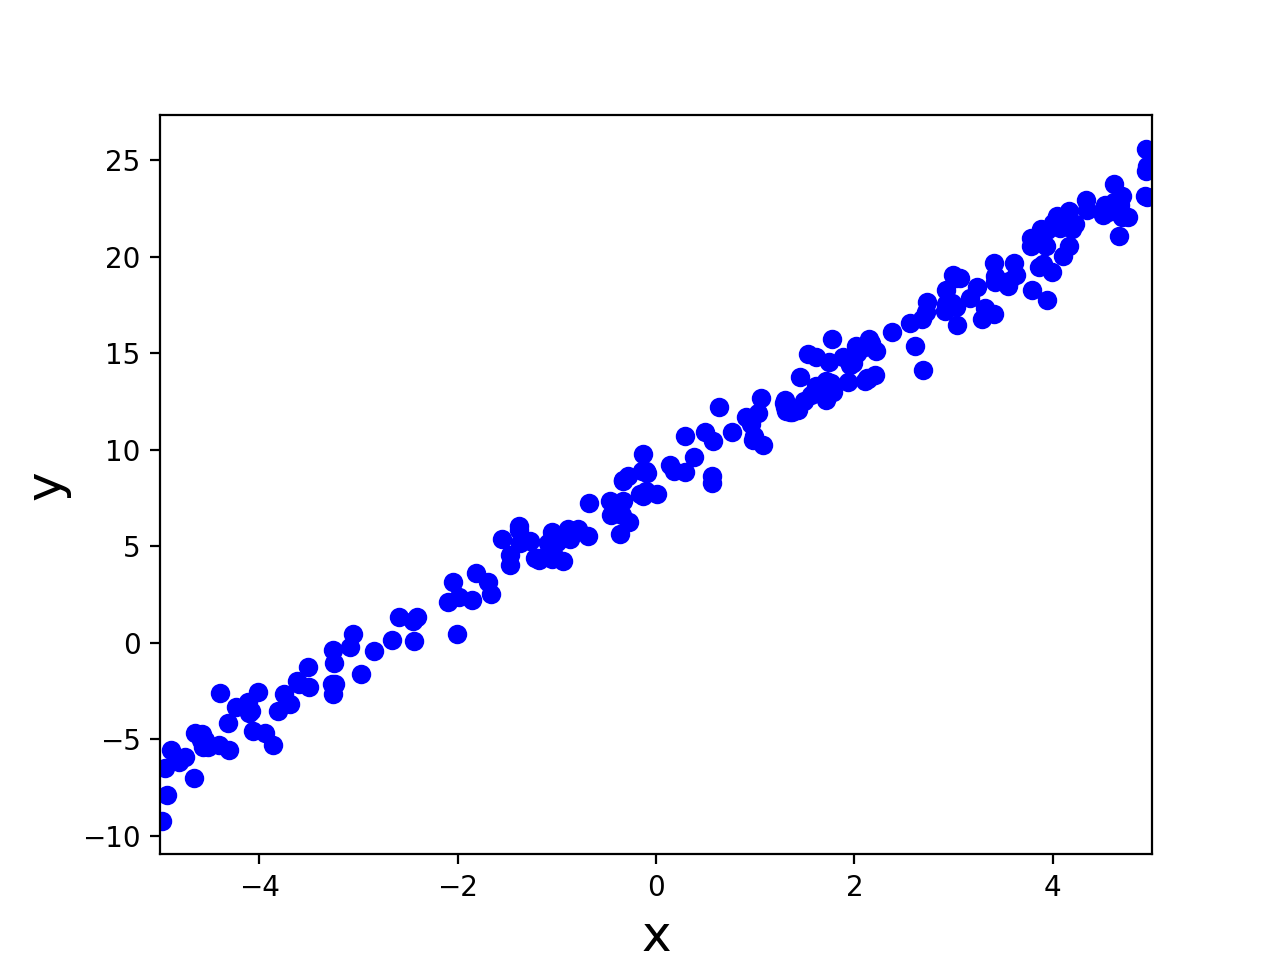

In [23]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


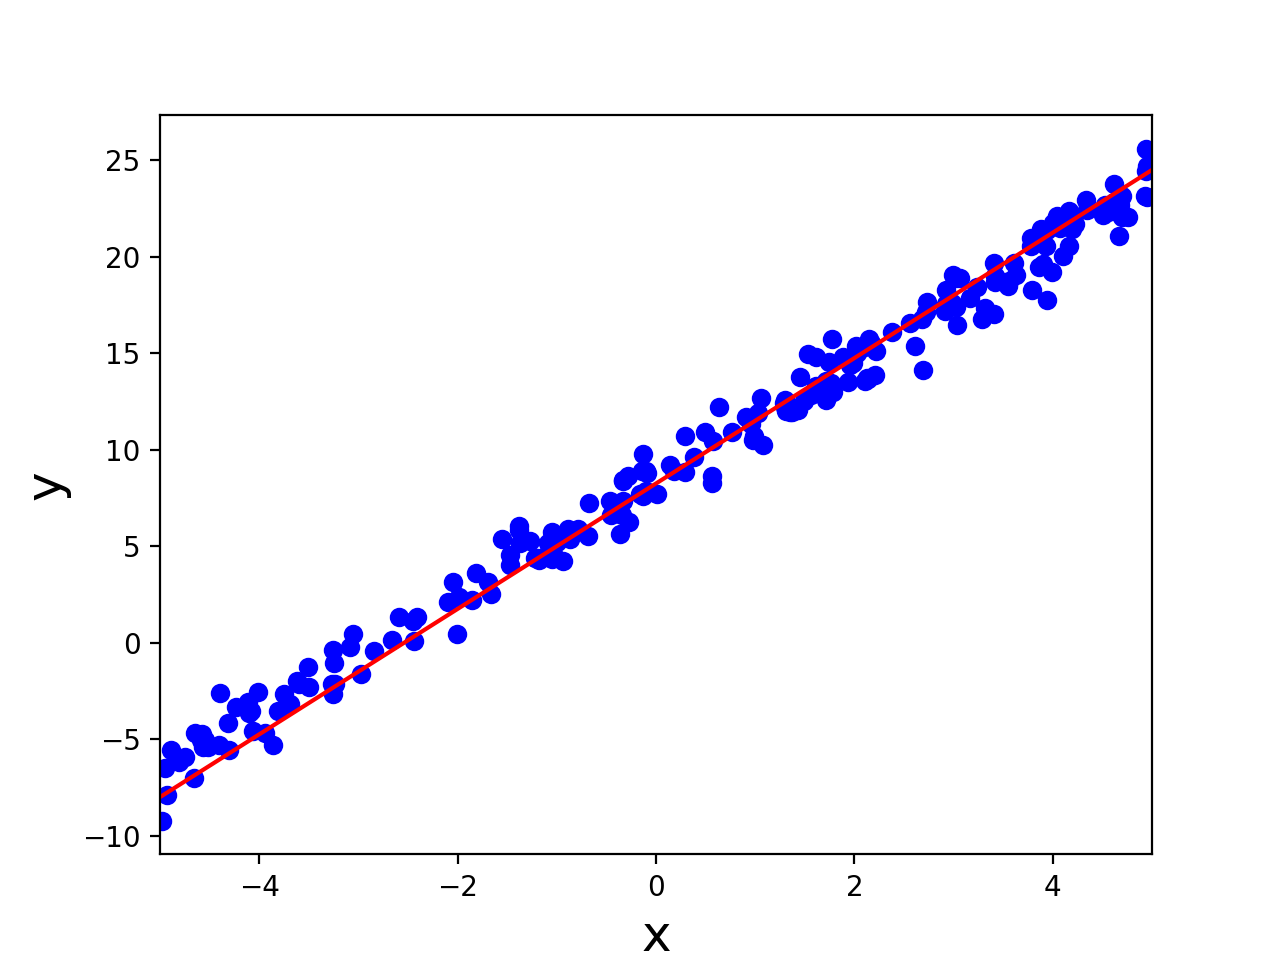

In [24]:
# 请选择最适合的直线 y = mx + b
m1 = 3.25
b1 = 8.25

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [25]:
# 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    mse = 0
    n = len(X)
    for i in range(n):
        mse += (Y[i]-m*X[i]-b)**2/n
    return mse

# 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.2440083607108277


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

> Twentynight 【注解】：
>
>之所以要乘以一个 $\frac{1}{2}$ 是为了之后求偏导数时，能约分消除求导二次方时产生的系数 $2$ ，纯为了精简美观的效果（尽管之后令偏导数为 $0$ 后也可以通过两边除以 $\frac{1}{2}$ 实现精简，不过当没给偏导数设定值的时候，就会多出一个常数项系数）

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

> **【证明】**
>
>因为：
>$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$
>
>所以有：
>$$
\frac{\partial E}{\partial m}
= \frac{\partial \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}}{\partial m}
= \frac{1}{2}\sum_{i=1}^{n}{\frac{\partial (y_i - mx_i - b)^2}{\partial m}}
= \frac{1}{2}\sum_{i=1}^{n}{2(y_i - mx_i - b)\frac{\partial (y_i - mx_i - b)}{\partial m}}
= \sum_{i=1}^{n}{- x_i(y_i - mx_i - b)}
$$
>
>同理可得：
>$$
\frac{\partial E}{\partial b}
= \frac{\partial \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}}{\partial b}
= \frac{1}{2}\sum_{i=1}^{n}{\frac{\partial (y_i - mx_i - b)^2}{\partial b}}
= \frac{1}{2}\sum_{i=1}^{n}{2(y_i - mx_i - b)\frac{\partial (y_i - mx_i - b)}{\partial b}}
= \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$
>
>综上所述，命题得证。

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

>目标函数 $E$：
>$$
E = \frac{1}{2}\sum_{i=1}^{3}{(y_i - mx_i - b)^2}
$$
>
>对应二元二次方程组：
>$$
\begin{cases}
\displaystyle
14m + 6b = 11 \\
\\
6m + 3b = 5 \\
\end{cases}
$$
>
>最优参数 $m, b$ ：
>$$
\begin{cases}
\displaystyle
m = \frac{1}{2} \\
\\
\displaystyle
b = \frac{2}{3} \\
\end{cases}
$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

> **【证明】**
>
>由上文的证明结果知：
>$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} \\
\\
\displaystyle
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)} \\
\end{cases}
$$
>
>
>$$ --> 
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m}
= \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
= \sum_{i=1}^{n}{mx_i^2 + bx_i - x_iy_i}
= m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} - \sum_{i=1}^{n}{x_iy_i}
\\
\\
\\
\displaystyle
\frac{\partial E}{\partial b}
= \sum_{i=1}^{n}{-(y_i - mx_i - b)}
= \sum_{i=1}^{n}{mx_i + b - y_i}
= m\sum_{i=1}^{n}{x_i} + nb - \sum_{i=1}^{n}{y_i}\\
\end{cases}
$$
>
>
>$$ --> 
\begin{bmatrix}
\frac{\partial E}{\partial m} \\ \\
\frac{\partial E}{\partial b} \end{bmatrix} =
\begin{bmatrix}
m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} - \sum_{i=1}^{n}{x_iy_i} \\ \\
m\sum_{i=1}^{n}{x_i} + nb - \sum_{i=1}^{n}{y_i} \end{bmatrix} =
\begin{bmatrix}
m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} \\ \\
m\sum_{i=1}^{n}{x_i} + b\sum_{i=1}^{n}{1} \end{bmatrix} - 
\begin{bmatrix}
\sum_{i=1}^{n}{x_iy_i} \\ \\
\sum_{i=1}^{n}{y_i} \end{bmatrix} 
$$
>
>
>$$ =
\begin{bmatrix}
m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i} \\ \\
m\sum_{i=1}^{n}{x_i} + b\sum_{i=1}^{n}{1} \end{bmatrix} -
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
\end{bmatrix}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i=1}^{n}{x_i^2} & \sum_{i=1}^{n}{x_i} \\ \\
    \sum_{i=1}^{n}{x_i} & \sum_{i=1}^{n}{1}
\end{bmatrix}
\begin{bmatrix}
m \\ \\
b \end{bmatrix} -
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
\end{bmatrix}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
$$
>
>
>$$ = 
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
\end{bmatrix}
\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1 \\
    ... & 1 \\
    x_n & 1
\end{bmatrix}
\begin{bmatrix}
m \\ \\
b \end{bmatrix} -
\begin{bmatrix}
    x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
\end{bmatrix}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix} = X^TXh - X^TY
$$
>
>
>$$ (
其中, 
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix}
,
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
)
$$
>
>
>综上所述，命题得证

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [26]:
# 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
def linearRegression2D(X,Y):
    def format_matrx(matrx):
        if isinstance(matrx[0], list):
            return matrx
        else:
            return [[k] for k in matrx]

    # 格式化输入
    formated_X = format_matrx(X)
    formated_Y = format_matrx(Y)
    
    # 求解最优系数
    unit_matrx = [[1]]*len(formated_X)
    aug_X = augmentMatrix(formated_X, unit_matrx)
    linSys = matxMultiply(transpose(aug_X), aug_X)
    b = matxMultiply(transpose(aug_X), formated_Y)
    solutions_li = gj_Solve(linSys, b)

    opt_m = solutions_li[0][0]
    opt_b = solutions_li[1][0]
    return opt_m, opt_b

In [27]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

3.0437288534172318 8.467874194516444


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


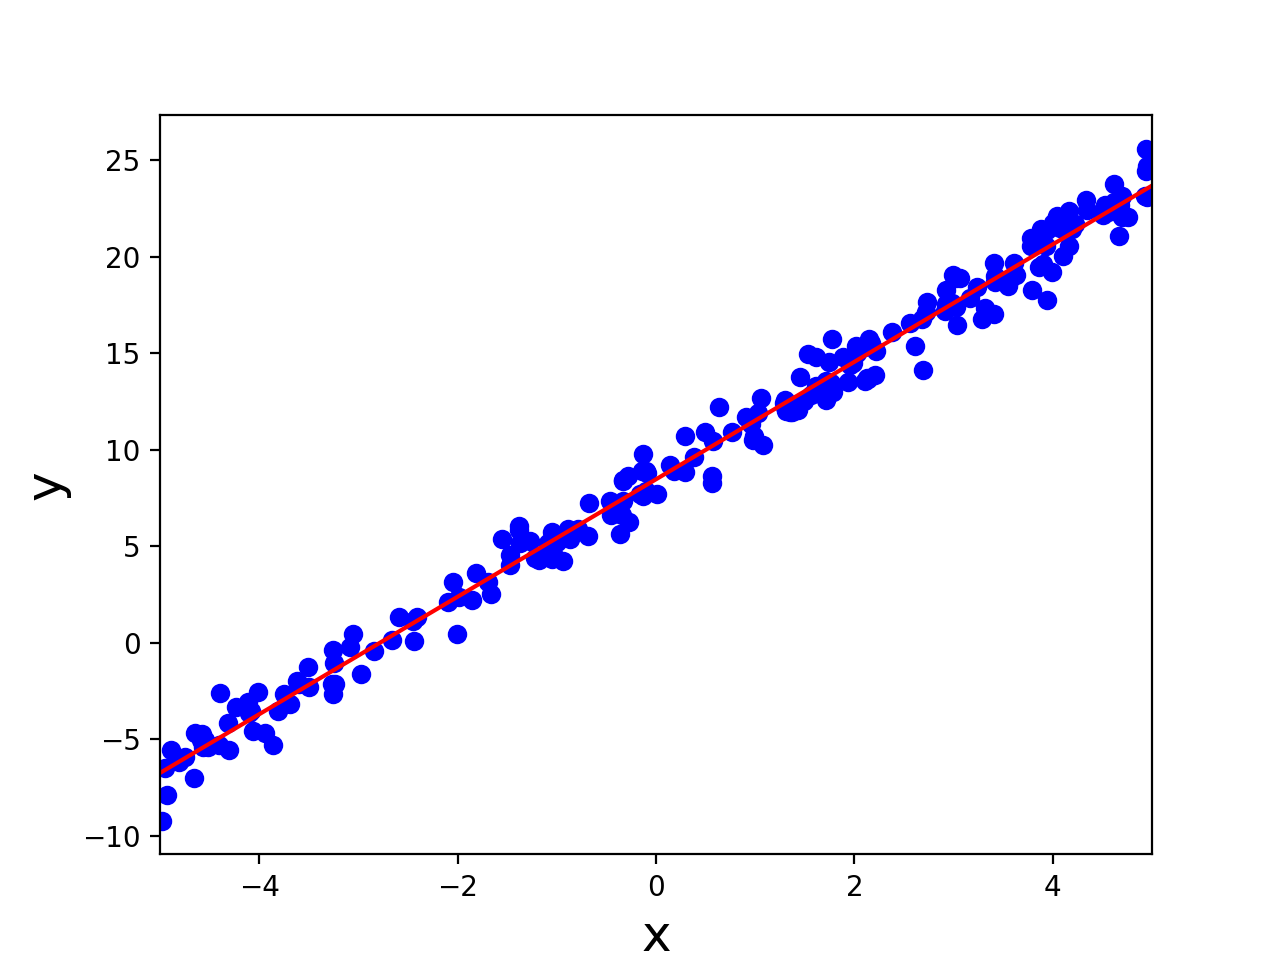

0.8568283359033907


In [28]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


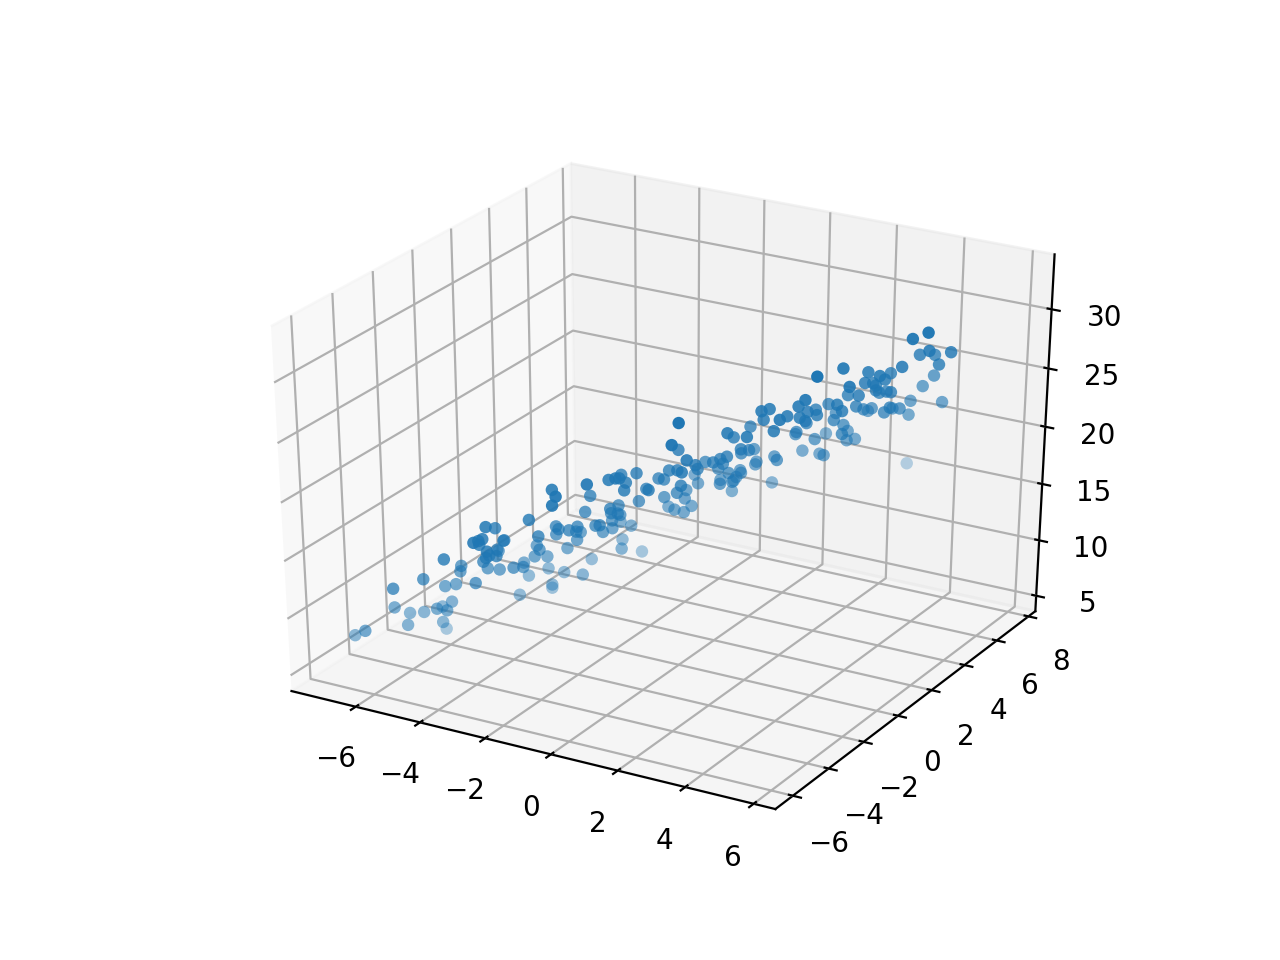

In [29]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

> **【分析】**
>
>对 $n$ 元线性方程：
$
y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ... + a_{n-1}x_{n-1} + a_nx_n
$
>
>
>给定 $m$ 组离散点：
>$
\begin{bmatrix}
    x_{11} & x_{12} & ... & x_{1n} \\
    x_{21} & x_{22} & ... & x_{2n} \\
    ... & ... & ... & ... \\
    x_{m1} & x_{m2} & ... & x_{mn} \\
\end{bmatrix},
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_m
\end{bmatrix}
$ 求最优回归系数：$a_0, a_1 ... a_n$
>
>
>由上文可知目标函数 $E$ 为：
>$$
E = \frac{1}{2}\sum_{i=1}^{m}{(y_i - \sum_{j=1}^{n}{a_jx_{ij}} - a_0)^2}
$$
>
>要解下面的方程组来得到最优回归系数：
>$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial a_0} =
\frac{\partial \frac{1}{2}\sum_{i=1}^{m}{(y_i - \sum_{j=1}^{n}{a_jx_{ij}} - a_0)^2}}{\partial a_0} = 0 \\ \\
\displaystyle
\frac{\partial E}{\partial a_1} =
\frac{\partial \frac{1}{2}\sum_{i=1}^{m}{(y_i - \sum_{j=1}^{n}{a_jx_{ij}} - a_0)^2}}{\partial a_1} = 0 \\ \\
\displaystyle
... \\ \\
\displaystyle
\frac{\partial E}{\partial a_n} =
\frac{\partial \frac{1}{2}\sum_{i=1}^{m}{(y_i - \sum_{j=1}^{n}{a_jx_{ij}} - a_0)^2}}{\partial a_n} = 0 \\ \\
\end{cases}
$$
>
>$$ -->
\begin{cases}
\displaystyle
\frac{\partial E}{\partial a_0} =
\displaystyle
\sum_{i=1}^{m}{-(y_i - \sum_{j=1}^{n}{a_jx_j} - a_0)} =
\sum_{i=1}^{m}{(\sum_{j=1}^{n}{a_jx_{ij}})} + a_0\sum_{i=1}^{m}{1} - \sum_{i=1}^{m}{y_i} =
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{ij}})} + a_0\sum_{i=1}^{m}{1} - \sum_{i=1}^{m}{y_i}
\\ \\
...
\\ \\
\displaystyle
\frac{\partial E}{\partial a_n} =
\displaystyle
\sum_{i=1}^{m}{-x_{in}(y_i - \sum_{j=1}^{n}{a_jx_{ij}} - a_0)} =
\sum_{i=1}^{m}{(x_{in}\sum_{j=1}^{n}{a_jx_{ij}})} + a_0\sum_{i=1}^{m}{x_{in}} - \sum_{i=1}^{m}{x_{in}y_i} = 
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{in}x_{ij}})} + a_0\sum_{i=1}^{m}{x_{in}} - \sum_{i=1}^{m}{x_{in}y_i} 
\end{cases}
$$
>
>
>$$ --> 
\begin{bmatrix}
\frac{\partial E}{\partial a_0} \\ \\
\frac{\partial E}{\partial a_1} \\ \\
... \\ \\
\frac{\partial E}{\partial a_n}
\end{bmatrix} =
\begin{bmatrix}
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{ij}})} + a_0\sum_{i=1}^{m}{1} - \sum_{i=1}^{m}{y_i} \\ \\
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{i1}x_{ij}})} + a_0\sum_{i=1}^{m}{x_{i1}} - \sum_{i=1}^{m}{x_{i1}y_i} \\ \\
... \\ \\
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{in}x_{ij}})} + a_0\sum_{i=1}^{m}{x_{in}} - \sum_{i=1}^{m}{x_{in}y_i} 
\end{bmatrix} =
\begin{bmatrix}
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{ij}})} + a_0\sum_{i=1}^{m}{1} \\ \\
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{i1}x_{ij}})} + a_0\sum_{i=1}^{m}{x_{i1}} \\ \\
... \\ \\
\sum_{j=1}^{n}{(a_j\sum_{i=1}^{m}{x_{in}x_{ij}})} + a_0\sum_{i=1}^{m}{x_{in}}
\end{bmatrix} - 
\begin{bmatrix}
\sum_{i=1}^{m}{y_i} \\ \\
\sum_{i=1}^{m}{x_{i1}y_i} \\ \\
... \\ \\
\sum_{i=1}^{m}{x_{in}y_i} \end{bmatrix}
$$
>
>
>$$=
\begin{bmatrix}
    1 & 1 & ... & 1 \\
    x_{11} & x_{21} & ... & x_{m1} \\
    x_{12} & x_{22} & ... & x_{m2} \\
    ... & ... & ... & ... \\
    x_{1n} & x_{2n} & ... & x_{mn} \\
\end{bmatrix}
\begin{bmatrix}
    1 & x_{11} & x_{12} & ... & x_{1n} \\
    1 & x_{21} & x_{22} & ... & x_{2n} \\
    1 & ... & ... & ... & ... \\
    1 & x_{m1} & x_{m2} & ... & x_{mn} \\
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
... \\
a_n \\
\end{bmatrix} -
\begin{bmatrix}
    1 & 1 & ... & 1 \\
    x_{11} & x_{21} & ... & x_{m1} \\
    x_{12} & x_{22} & ... & x_{m2} \\
    ... & ... & ... & ... \\
    x_{1n} & x_{2n} & ... & x_{mn} \\
\end{bmatrix}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_m
\end{bmatrix} = X^TXh - X^TY
$$
>
>
>$$ (
其中, 
X =  \begin{bmatrix}
    1 & x_{11} & x_{12} & ... & x_{1n} \\
    1 & x_{21} & x_{22} & ... & x_{2n} \\
    1 & ... & ... & ... & ... \\
    1 & x_{m1} & x_{m2} & ... & x_{mn} \\
\end{bmatrix}
,
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_m
\end{bmatrix}
,
h = \begin{bmatrix}
    a_0 \\
    a_1 \\
    ... \\
    a_n \\
\end{bmatrix}
)
$$

In [30]:
def linearRegression(X,Y,dimension=3):
    def format_matrx(matrx):
        if isinstance(matrx[0], list):
            return matrx
        else:
            return [[k] for k in matrx]

    def mutated_augMat(A, b):
        a_shp = shape(A)
        b_shp = shape(b)
        if a_shp[0] != b_shp[0] or b_shp[1] != 1:
            raise ValueError("column and row doesn't match. check the inputs.")
        aug_matx = []
        for i in range(a_shp[0]):
            aug_matx.append(b[i] + A[i])

        return aug_matx

    # 格式化输入
    formated_X = format_matrx(X)
    formated_Y = format_matrx(Y)
    
    # 求解最优系数
    unit_matrx = [[1]]*len(formated_X)
    aug_X = mutated_augMat(formated_X, unit_matrx)
    linSys = matxMultiply(transpose(aug_X), aug_X)
    b = matxMultiply(transpose(aug_X), formated_Y)
    solutions_li = gj_Solve(linSys, b)
    
    # 由于 help.py 里相关函数的调用顺序问题，这里要把常数项 a0 放到最后的位置
    coeff = [k[0] for k in solutions_li[1:]]
    coeff = coeff + solutions_li[0]
    return coeff

In [31]:
# 利用新的多元回归系数函数，重新定义 linearRegression2D 函数，再次求上文中的二元线性回归的系数
def my_li_Re2D(X,Y):
    coef = linearRegression(X,Y,dimension=2)
    m = coef[0]
    b = coef[1]
    return m,b
L,K = generatePoints2D(seed)
new_fun_m, new_fun_b = my_li_Re2D(L,K)
old_func_m, old_func_b = linearRegression2D(L,K)
print(new_fun_m, new_fun_b)
print(old_func_m, old_func_b)

3.043728853417231 8.467874194516446
3.0437288534172318 8.467874194516444


<IPython.core.display.Javascript object>


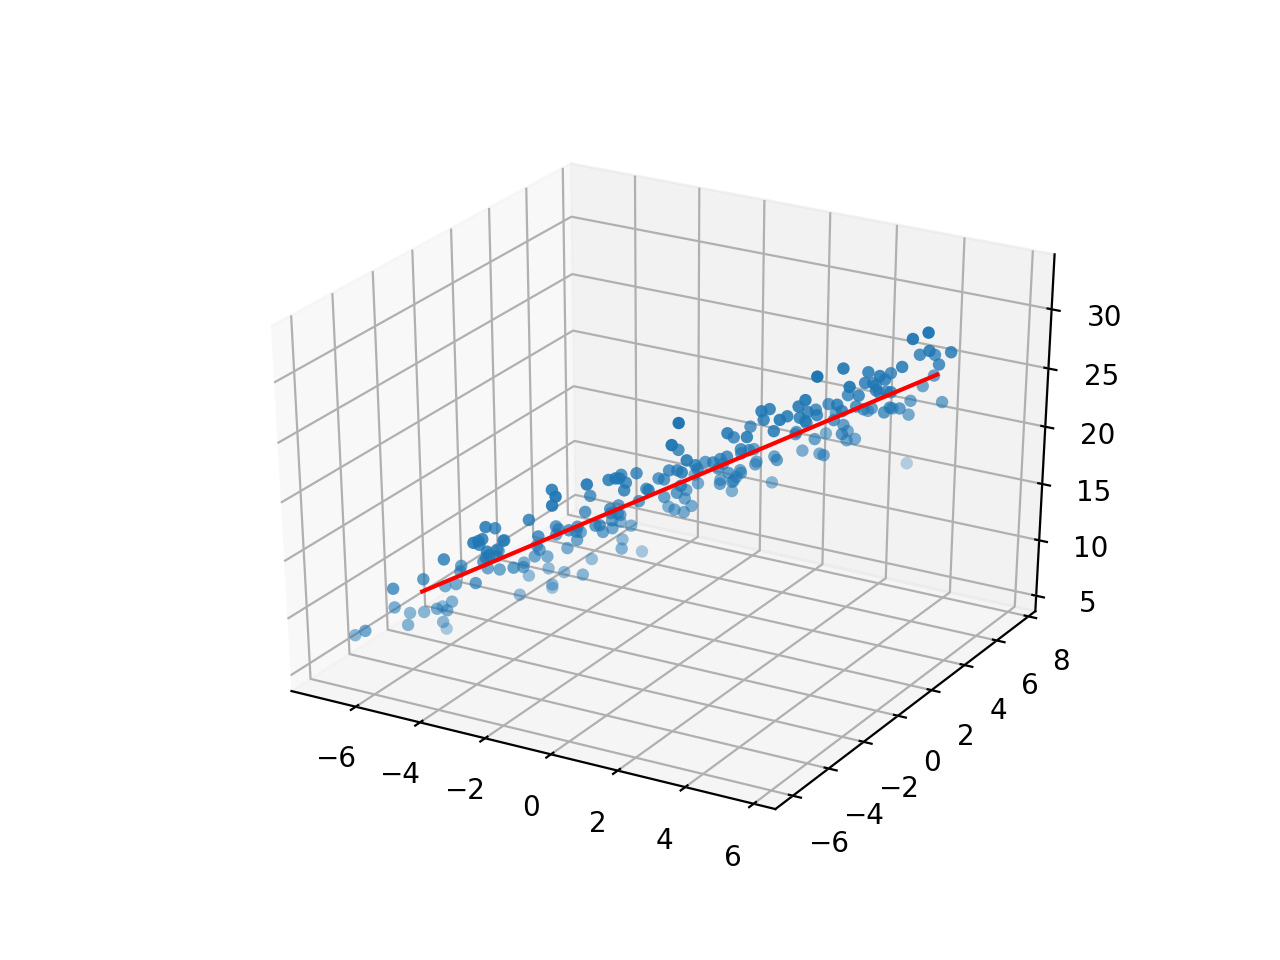

In [32]:
coeff = linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'linear_regression_project_twentynight.ipynb'])

0